1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


In [132]:
!apt-get install -qq git

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind


In [84]:
#1
HR=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW/HR.csv', sep=',')
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#2
table_1 = HR[['satisfaction_level','last_evaluation','number_project','time_spend_company']].describe().transpose().reset_index()
table_2 = HR[['satisfaction_level','last_evaluation','number_project','time_spend_company']].aggregate(['median', 'var']).transpose().reset_index(0)
table_3 = HR[['average_montly_hours','time_spend_company',	'Work_accident',	'left',	'promotion_last_5years',	'department',	'salary']].mode().transpose().reset_index(0)

table_1['range'] = table_1['max']-table_1['min']
table_1['iqr'] = table_1['75%']-table_1['25%']
table_1['lower_bound'] = table_1['25%'] - (1.5 * table_1['iqr'])
table_1['upper_bound'] = table_1['75%'] + (1.5 * table_1['iqr'])

Describe_table=(table_1
.merge(table_2, on = 'index', how='outer')
.merge(table_3, on = 'index', how='outer')
).rename(columns={0: 'mode',1: 'mode2'})
Describe_table.head(10)

,index,count,mean,std,min,25%,50%,75%,max,range,iqr,lower_bound,upper_bound,median,var,mode,mode2
0,satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,0.91,0.38,-0.130,1.390,0.64,0.061817,NaN,NaN
1,last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,0.64,0.31,0.095,1.335,0.72,0.029299,NaN,NaN
2,number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0,5.00,2.00,0.000,8.000,4.00,1.519284,NaN,NaN
3,time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0,8.00,1.00,1.500,5.500,3.00,2.131998,3.0,NaN
4,average_montly_hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,156
5,Work_accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,promotion_last_5years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
8,department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,NaN
9,salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.8 MB/s eta 0:00:00
interval columns not set, guessing: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


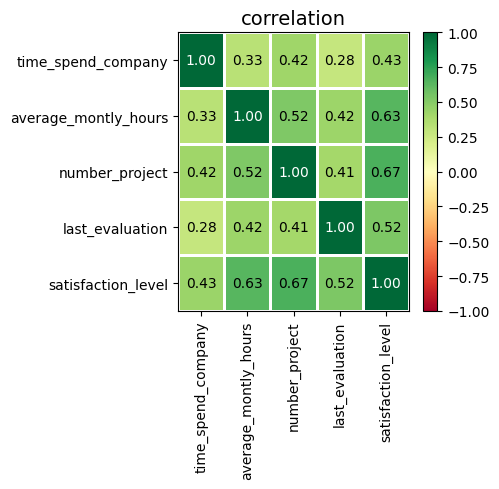

In [11]:
#3
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix
phik_matrix = HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].phik_matrix()
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(5, 5))
#скоррелированные переменные(выше среднего): уровень удовлетворенности работой завивист от кол-во проектов и среднего кол-во часов на рабочем месте.
#наименее коррелируемые время последней оценки и стаж работы

In [ ]:
#4
HR.pivot_table(index='department', values='salary', aggfunc='count').reset_index().head(30)

,department,salary
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

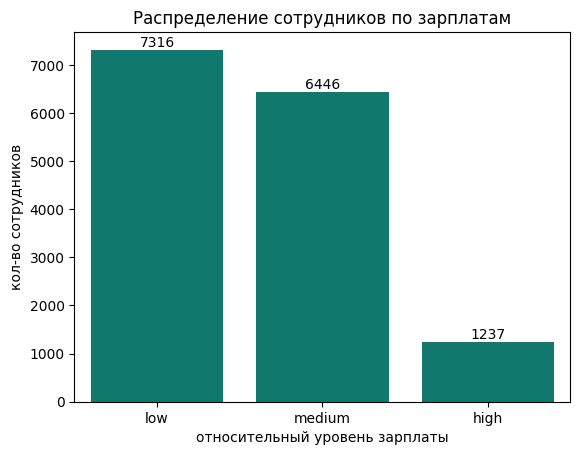

In [68]:
#5
HR['salary'].value_counts(normalize=True, ascending=True)
ax = sns.countplot(data=HR, x='salary', color='#00897b')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('относительный уровень зарплаты')
plt.ylabel('кол-во сотрудников')
plt.title('Распределение сотрудников по зарплатам')

Text(0.5, 9.444444444444324, 'относительный уровень зарплаты')

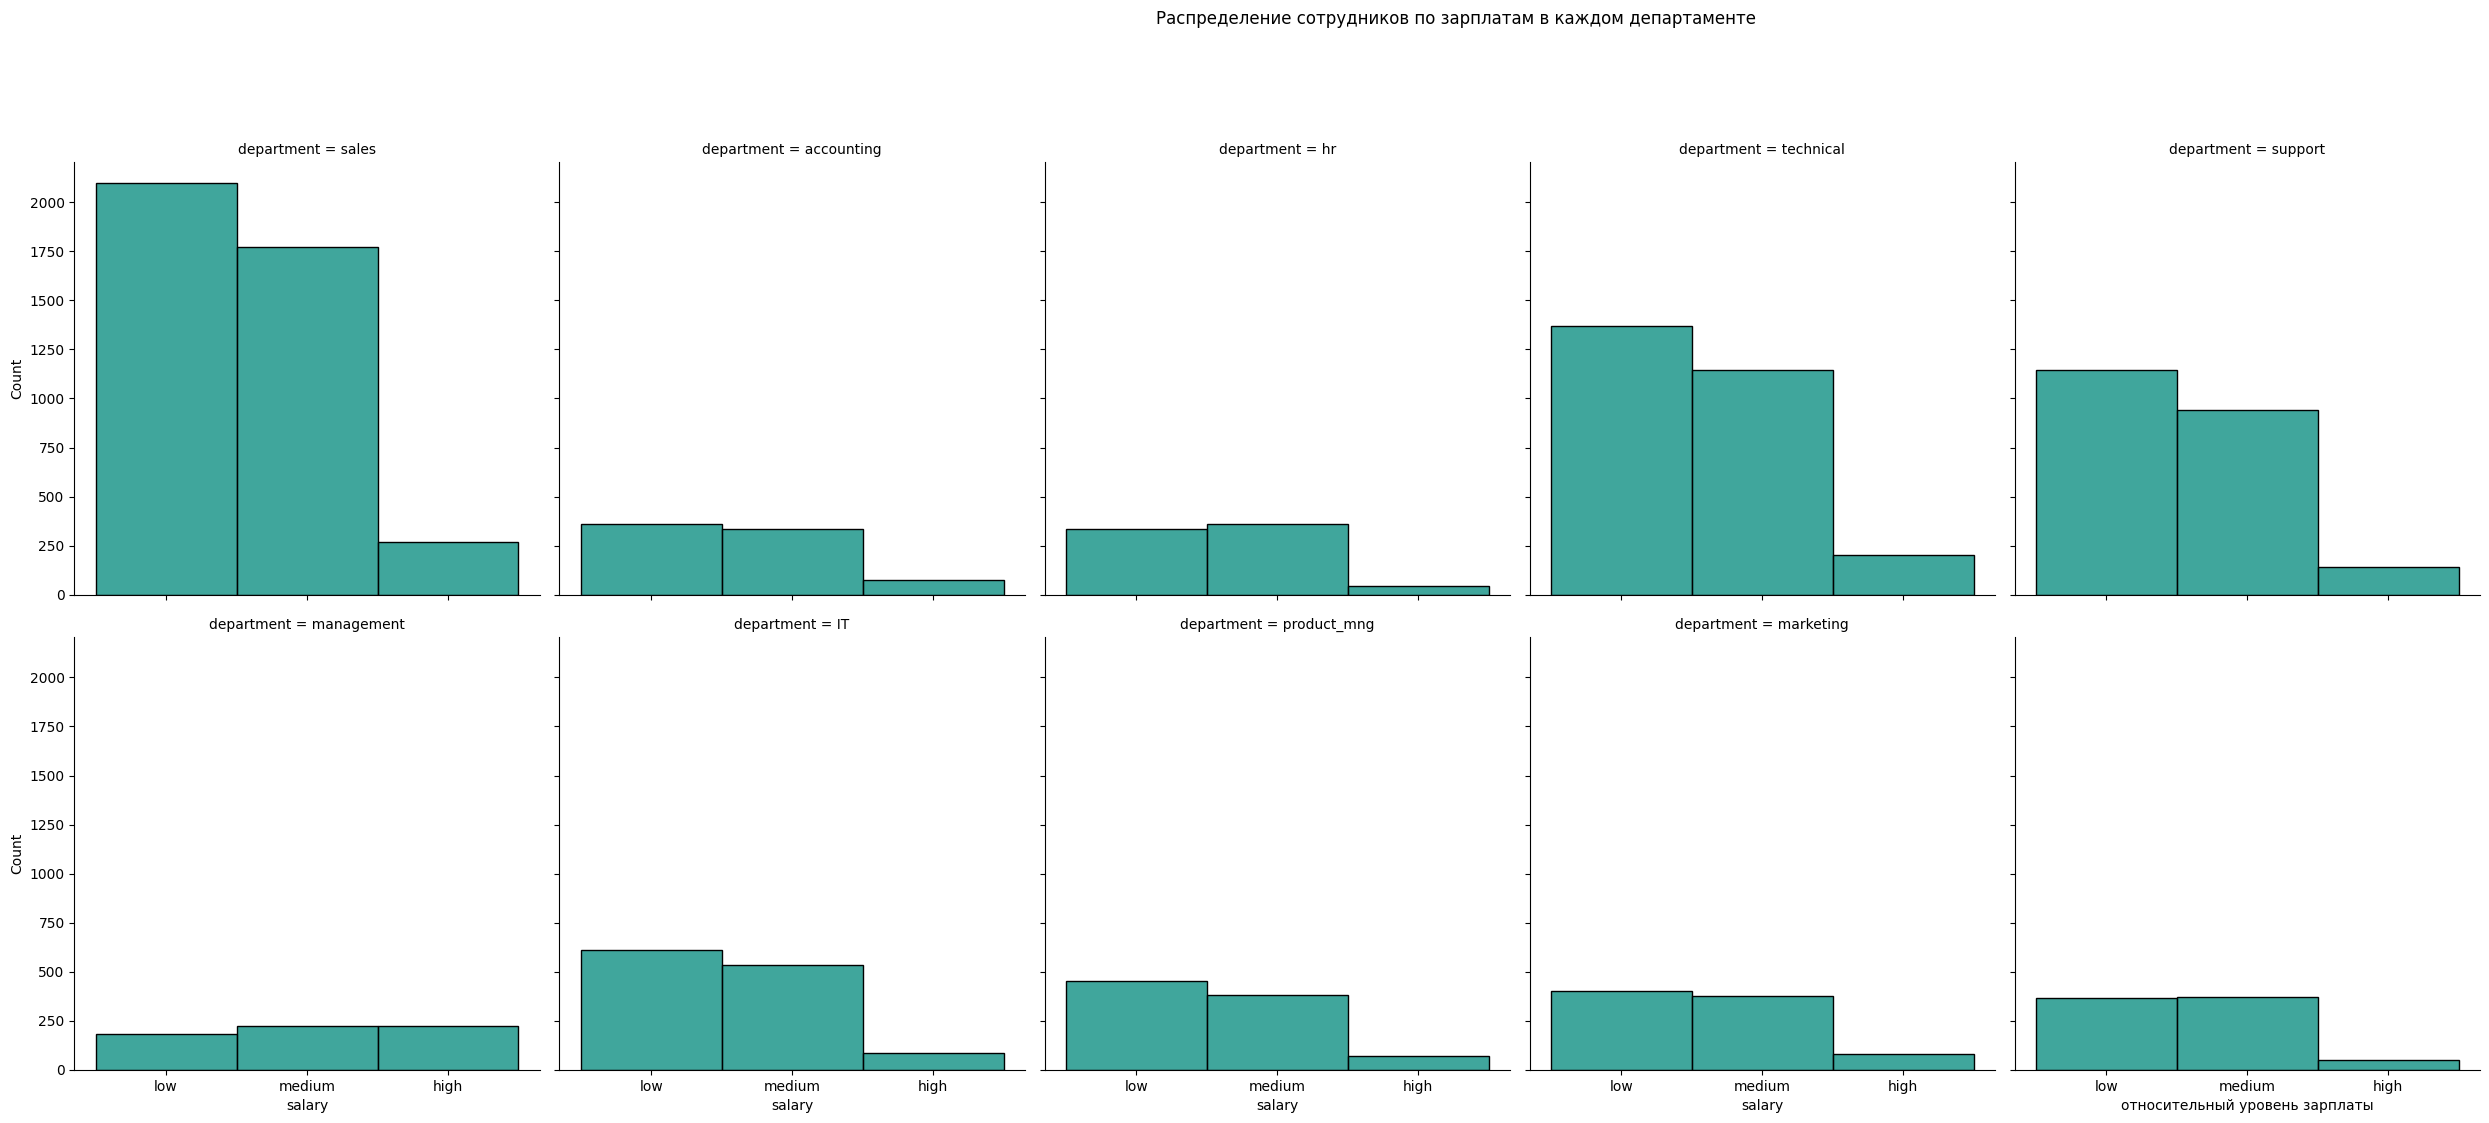

In [131]:
#6
HR['salary'].value_counts(normalize=True, ascending=True)
sns.displot(data=HR, x='salary', col='department',color='#00897b',col_wrap=5)

plt.title('Распределение сотрудников по зарплатам в каждом департаменте',x= -1.2 , y= 2.4)
plt.xlabel('относительный уровень зарплаты')


stat = 0.971, p = 0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально для сотрудников с высоким окладом
stat = 0.960, p = 0.00000
Отклоняем нулевую гипотезу >> Данные распределены не нормально для сотрудников с низким окладом
Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


<Axes: xlabel='average_montly_hours', ylabel='Density'>

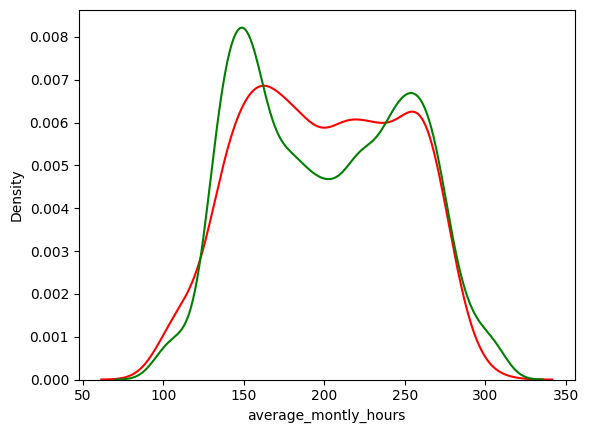

In [ ]:
#7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
H_salary = HR[HR['salary']=='high']
L_salary = HR[HR['salary']=='low']
#1

stat, p = stats.shapiro(H_salary['average_montly_hours'])
print(f'stat = {stat:.3f}, p = {p:.5f}')
if p<0.05:
  print("Отклоняем нулевую гипотезу >> Данные распределены не нормально для сотрудников с высоким окладом")
else:
  print("Не отклоняем нулевую гипотезу >> Данные распределены нормально для сотрудников с высоким окладом")

stat, p = stats.shapiro(L_salary['average_montly_hours'])
print(f'stat = {stat:.3f}, p = {p:.5f}')
if p<0.05:
  print("Отклоняем нулевую гипотезу >> Данные распределены не нормально для сотрудников с низким окладом")
else:
  print("Не отклоняем нулевую гипотезу >> Данные распределены нормально для сотрудников с низким окладом")


stat, p = stats.mannwhitneyu(H_salary['average_montly_hours'], L_salary['average_montly_hours'])
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


sns.kdeplot(H_salary['average_montly_hours'], color = 'red')
sns.kdeplot(L_salary['average_montly_hours'], color = 'green')

In [87]:
#8
HR_left = HR[HR['left']==1] #сотрудники уволились
HR_stay = HR[HR['left']==0] #сотрудники не уволились
#средняя степень удовлетворенности и среднее кол-во проектов у оставшихся
HR_stay.pivot_table(index='left', values=['satisfaction_level','number_project'], aggfunc='mean')


,number_project,satisfaction_level
left,,
0,3.786664,0.66681


In [88]:
#доля сотрудников с повышением 97% среди оставшихся
HR_stay['promotion_last_5years'].value_counts(normalize=True)

,proportion
promotion_last_5years,
0,0.973749
1,0.026251


In [86]:
#средняя степень удовлетворенности и среднее кол-во проектов у уволившихся
HR_left.pivot_table(index='left', values=['satisfaction_level','number_project'], aggfunc='mean')

,proportion
promotion_last_5years,
0,0.994679
1,0.005321


In [89]:
#доля сотрудников с повышением 99% среди уволившихся
HR_left['promotion_last_5years'].value_counts(normalize=True)

,proportion
promotion_last_5years,
0,0.994679
1,0.005321


In [10]:
#9
HR.info()
HR.drop(['department', 'salary'], axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [60]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = HR.drop('left', axis = 1)
y = HR['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA.predict(X_test)
res=pd.DataFrame([y_test,LDA.predict(X_test)]).T
#определим точность модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test,LDA.predict(X_test))

0.7616